**this is a notebook for eda q13**

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 22 19:55:46 2019

@author: vs
"""

# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# importing the dataset

df = pd.read_csv('energy.csv')

In [4]:
"""
This dataset measures the energy use in kwH for Downing Street Complex (home and residence for British PM).
The dataset measures the values for year of 2017 and gives the energy consumntion in every half-hour interval. 

There is 1 missing value in "Electricity Used" column. At starting point, there is no energy used. 
Therefore, I have dropped that value.

There are 3 variables: "Date", "Time", "Electricity Used (in kwH)"
There are 17519 observations for each variable (after removing the null value.
"""
df = df.dropna()

# Renaming columns to shorten the names and remove any whitespace from column names
df.columns = ['time', 'elec', 'date']

# Combining date time columns into one column
df['date_time'] = df['date'].astype(str) + ' ' + df['time']

# converting columns to date time format
df['date_time'] = pd.to_datetime(df['date_time'], infer_datetime_format = True)

# deleting date and time columns
df = df.drop(columns=['date', 'time'])

# setting index of the dataframe as new date_time column so mean and median for different frequencies can be found.
df = df.set_index('date_time')


In [5]:
# inspect dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17519 entries, 2017-01-01 00:30:00 to 2017-12-31 09:30:00
Data columns (total 1 columns):
elec    17519 non-null float64
dtypes: float64(1)
memory usage: 273.7 KB


In [6]:
# visit first 5 rows of dataset
df.head()

,elec
date_time,
2017-01-01 00:30:00,50.8
2017-01-01 01:00:00,54.1
2017-01-01 01:30:00,54.0
2017-01-01 10:00:00,50.3
2017-01-01 10:30:00,51.4


In [7]:
# Visually exploring the electricity used for each half hour interval, using histogram and boxplot and get summary statistics for whole electricity column
df['elec'].describe()

count    17519.000000
mean        57.833164
std         13.721961
min         36.900000
25%         45.500000
50%         55.200000
75%         68.100000
max        107.800000
Name: elec, dtype: float64

(array([3045., 4146., 2589., 2389., 2520., 1556.,  716.,  347.,  158.,
          53.]),
 array([ 36.9 ,  43.99,  51.08,  58.17,  65.26,  72.35,  79.44,  86.53,
         93.62, 100.71, 107.8 ]),
 <a list of 10 Patch objects>)

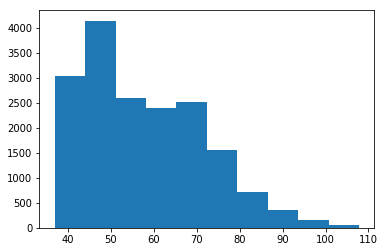

In [8]:
plt.hist(df['elec'])

{'whiskers': [<matplotlib.lines.Line2D at 0x11cf10470>,
 'caps': [<matplotlib.lines.Line2D at 0x11cf10b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x11cf10080>],
 'medians': [<matplotlib.lines.Line2D at 0x11cf10f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x11cf1e518>],
 'means': []}

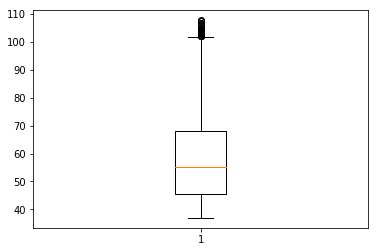

In [9]:
plt.boxplot(df['elec'])

In [10]:
# Resampling: calculating mean and median of energy usage on daily, weekly, monthly basis.
daily_mean = df.resample('D').mean()
daily_median = df.resample('D').median()

weekly_mean = df.resample('W').mean()
weekly_median = df.resample('W').median()

monthly_mean = df.resample('M').mean()
monthly_median = df.resample('M').median()

**plotting mean and median energy values on daily, weekly, monthly basis to visualize trends.**

Text(0.5, 1.0, 'Average Daily Energy Usage')

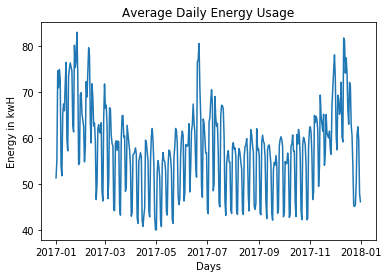

In [11]:
plt.plot(daily_mean)
plt.xlabel('Days')
plt.ylabel('Energy in kwH')
plt.title('Average Daily Energy Usage')

Text(0.5, 1.0, 'Median Daily Energy Usage')

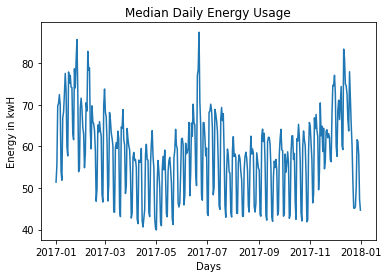

In [12]:
plt.plot(daily_median)
plt.xlabel('Days')
plt.ylabel('Energy in kwH')
plt.title('Median Daily Energy Usage')

Text(0.5, 1.0, 'Average Weekly Energy Usage')

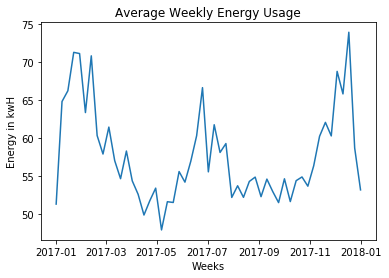

In [13]:
plt.plot(weekly_mean)
plt.xlabel('Weeks')
plt.ylabel('Energy in kwH')
plt.title('Average Weekly Energy Usage')

Text(0.5, 1.0, 'Median Weekly Energy Usage')

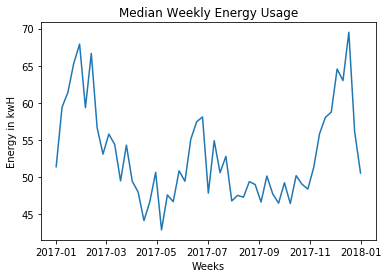

In [14]:
plt.plot(weekly_median)
plt.xlabel('Weeks')
plt.ylabel('Energy in kwH')
plt.title('Median Weekly Energy Usage')

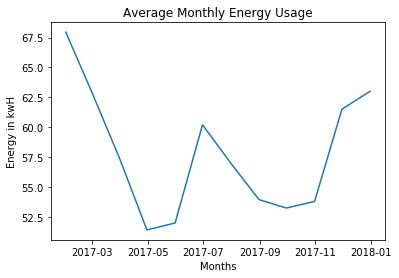

In [15]:
plt.plot(monthly_mean)
plt.xlabel('Months')
plt.ylabel('Energy in kwH')
plt.title('Average Monthly Energy Usage')
plt.show()

Text(0.5, 1.0, 'Median Monthly Energy Usage')

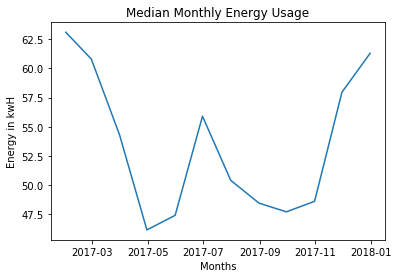

In [16]:
plt.plot(monthly_median)
plt.xlabel('Months')
plt.ylabel('Energy in kwH')
plt.title('Median Monthly Energy Usage')